## Подключение модулей


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




## Загрузка данных

In [2]:
df = pd.read_csv('Churn_Modelling.csv', sep = ';')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df['Geography_num'] = df['Geography']
number = {'France':0, 'Spain':1, 'Germany':2}
df['Geography_num'] = df['Geography_num'].map(number)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0


In [4]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


## Обучение моделей (models fitting)

### Подготовка данных

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']


In [7]:
X = pd.concat([df[features_names]], axis = 1)
X.shape
y = df['Exited']

### Разделение набора данных

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred_test = knn.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_pred_test)
knn_accuracy = accuracy_score(y_test, knn_pred_test)
knn_error_rate = 1 - knn_accuracy
knn_precision_score = precision_score(y_test, knn_pred_test)
knn_recall = recall_score(y_test, knn_pred_test)
knn_roc_auc_score = roc_auc_score(y_test, knn_pred_test, average='macro')
knn_fpr , knn_tpr, knn_thresholds = roc_curve(y_test, knn_pred_test)


y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)


print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

print(classification_report(y_test, knn_pred_test))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2657
           1       0.26      0.10      0.14       643

    accuracy                           0.77      3300
   macro avg       0.53      0.51      0.50      3300
weighted avg       0.70      0.77      0.73      3300



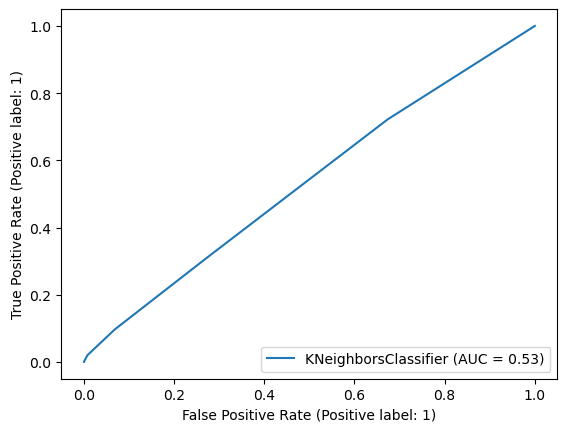

In [11]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

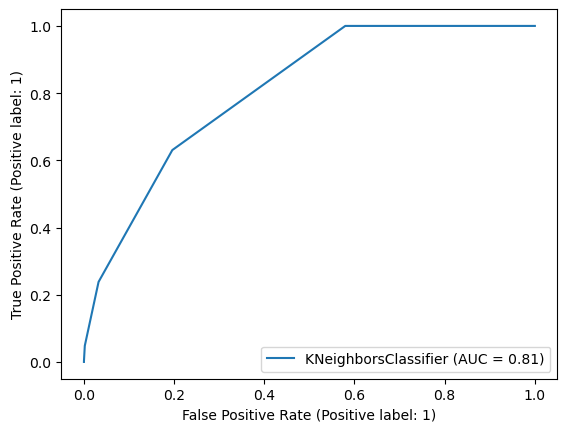

In [12]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
gnb_pred_test = gnb.predict(X_test)

gnb_cm = confusion_matrix(y_test, gnb_pred_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
gnb_error_rate = 1 - gnb_accuracy
gnb_precision_score = precision_score(y_test, gnb_pred_test)
gnb_recall = recall_score(y_test, gnb_pred_test)
gnb_roc_auc_score = roc_auc_score(y_test, gnb_pred_test, average='macro')
gnb_fpr , gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_pred_test)

y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

print(classification_report(y_test, gnb_pred_test))

train accuracy:  0.7820895522388059
test accuracy:  0.7942424242424242
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.37      0.08      0.13       643

    accuracy                           0.79      3300
   macro avg       0.59      0.52      0.51      3300
weighted avg       0.73      0.79      0.74      3300



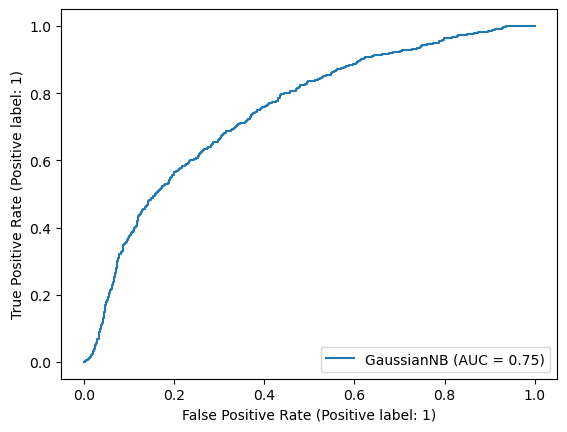

In [20]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

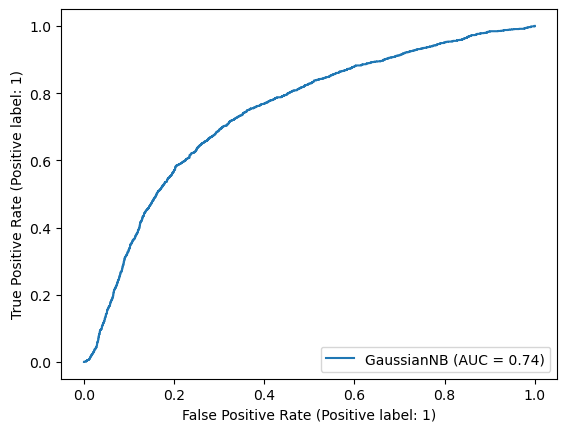

In [21]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

### Random Forest Classifier (Классификатор дерева решений)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [14]:
rfc_pred_test = rfc.predict(X_test)

rfc_cm = confusion_matrix(y_test, rfc_pred_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_error_rate = 1 - rfc_accuracy
rfc_precision_score = precision_score(y_test, rfc_pred_test)
rfc_recall = recall_score(y_test, rfc_pred_test)
rfc_roc_auc_score = roc_auc_score(y_test, rfc_pred_test, average='macro')
rfc_fpr , rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_pred_test)


y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)


print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

print(classification_report(y_test, rfc_pred_test))

train accuracy:  0.8832835820895523
test accuracy:  0.8642424242424243
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2657
           1       0.79      0.42      0.54       643

    accuracy                           0.86      3300
   macro avg       0.83      0.69      0.73      3300
weighted avg       0.86      0.86      0.85      3300



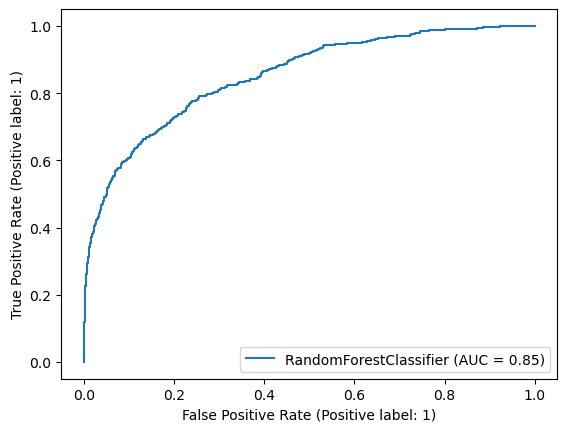

In [15]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

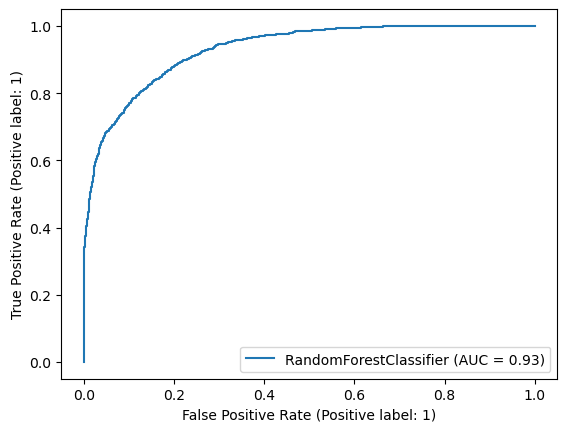

In [16]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

### Logistic Regression (Логистическая регрессия)

In [22]:
from sklearn.linear_model import LogisticRegression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
lr_pred_test = lr.predict(X_test)

lr_cm = confusion_matrix(y_test, lr_pred_test)
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_error_rate = 1 - lr_accuracy
lr_precision_score = precision_score(y_test, lr_pred_test)
lr_recall = recall_score(y_test, lr_pred_test)
lr_roc_auc_score = roc_auc_score(y_test, lr_pred_test, average='macro')
lr_fpr , knn_tpr, lr_thresholds = roc_curve(y_test, lr_pred_test)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)


print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

print(classification_report(y_test, lr_pred_test))

train accuracy:  0.8034328358208955
test accuracy:  0.816060606060606
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2657
           1       0.60      0.17      0.26       643

    accuracy                           0.82      3300
   macro avg       0.71      0.57      0.58      3300
weighted avg       0.78      0.82      0.77      3300



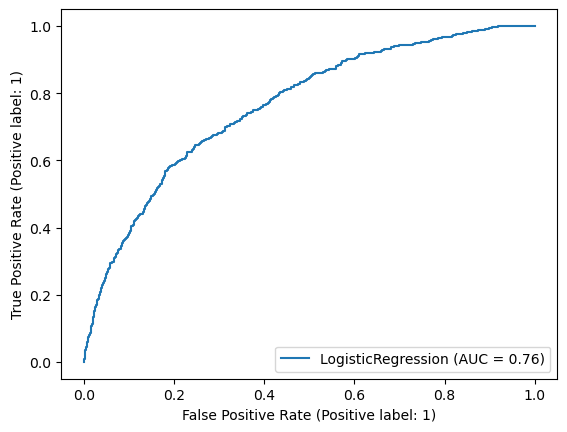

In [25]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

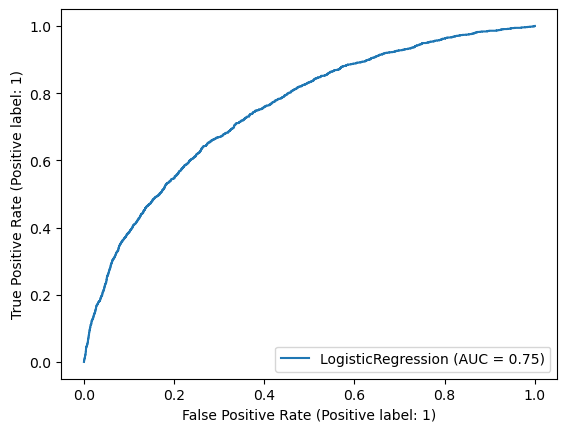

In [26]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

### Метрики классификации

In [27]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [28]:
log

,Classifier,Accuracy,Error Rate,Precision,Recall,AUC Score
0,KNeighborsClassifier,0.769091,0.230909,0.255144,0.096423,0.514151
1,Gaussian Naive Bayes,0.794242,0.205758,0.367647,0.077760,0.522697
2,Random Forest Classifier,0.864242,0.135758,0.785924,0.416796,0.694661
3,Logistic Regression,0.816061,0.183939,0.600000,0.167963,0.570432


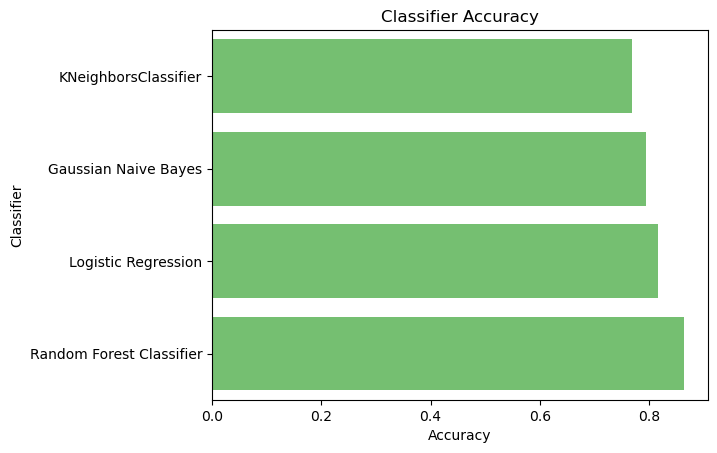

In [29]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="g");

Точнее всех оказался Random Forest Classifier 